___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

# Tasks

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, Normalizer, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
import shap
import pickle

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

Import Male and Female Datasets

In [6]:
male = pd.read_csv('ansur_ii_male_public.csv')

In [7]:
female = pd.read_csv('ansur_ii_female_public.csv')

In [8]:
male.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        369               274               493   
1                        338               257               479   
2                        408               261               544   
3                        359               262               518   
4                        356               263               524   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  71               319                        291   
1                  67               344                        320   
2                  75               345                        330   
3                  73               328                        309   
4                  80               340                        310   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 142                   979           240            882   
1                 135                   944           232            870   
2                 135                  1054           258            901   
3                 143                   991           242            821   
4                 138                  1029           275           1080   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                619                     509                373   
1                584                     468                357   
2                623                     506                412   
3                560                     437                395   
4                706                     567                425   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1535           291                1074         259         1292   
1             1471           269                1021         253         1244   
2             1501           288                1120         267         1288   
3             1423           296                1114         262         1205   
4             1684           304                1048         232         1452   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           877                    607                             351   
1           851                    615                             376   
2           854                    636                             359   
3           769                    590                             341   
4          1014                    682                             382   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          36         71             19              247               802   
1          33         62             18              232        

In [9]:
male.shape

(4082, 108)

In [10]:
female.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10037                             231            1282   
1      10038                             194            1379   
2      10042                             183            1369   
3      10043                             261            1356   
4      10051                             309            1303   

   acromionradialelength  anklecircumference  axillaheight  \
0                    301                 204          1180   
1                    320                 207          1292   
2                    329                 233          1271   
3                    306                 214          1250   
4                    308                 214          1210   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      222               177                373   
1                      225               178                372   
2                      237               196                397   
3                      240               188                384   
4                      217               182                378   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        315               263               466   
1                        272               250               430   
2                        300               276               450   
3                        364               276               484   
4                        320               336               525   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  65               338                        301   
1                  64               294                        270   
2                  69               309                        270   
3                  68               340                        294   
4                  67               300                        295   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 141                  1011           223            836   
1                 126                   893           186            900   
2                 128                   987           204            861   
3                 144                  1012           253            897   
4                 135                  1281           284            811   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                587                     476                360   
1                583                     483                350   
2                583                     466                384   
3                599                     471                372   
4                607                     467                433   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1336           274                 922         245         1095   
1             1440           261                 839         206         1234   
2             1451           287                 874         223         1226   
3             1430           269                1008         285         1170   
4             1362           305                1089         290         1112   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           759                    557                             310   
1           835                    549                             329   
2           821                    643                             374   
3           804                    640                             351   
4           726                    686                             356   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          35         65             16              220               713   
1          32         60             23              208        

In [11]:
female.shape

(1986, 108)

Concatent the male and female datasets

In [12]:
df = pd.concat([male,female],axis=0,ignore_index=True)

In [13]:
df.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        369               274               493   
1                        338               257               479   
2                        408               261               544   
3                        359               262               518   
4                        356               263               524   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  71               319                        291   
1                  67               344                        320   
2                  75               345                        330   
3                  73               328                        309   
4                  80               340                        310   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 142                   979           240            882   
1                 135                   944           232            870   
2                 135                  1054           258            901   
3                 143                   991           242            821   
4                 138                  1029           275           1080   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                619                     509                373   
1                584                     468                357   
2                623                     506                412   
3                560                     437                395   
4                706                     567                425   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1535           291                1074         259         1292   
1             1471           269                1021         253         1244   
2             1501           288                1120         267         1288   
3             1423           296                1114         262         1205   
4             1684           304                1048         232         1452   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           877                    607                             351   
1           851                    615                             376   
2           854                    636                             359   
3           769                    590                             341   
4          1014                    682                             382   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          36         71             19              247               802   
1          33         62             18              232        

In [14]:
df.shape

(6068, 108)

## Explore Data

- describe function illustrate the standard deviation, count of observations , and mean 
- we can observe that there is missing values in ethnicity 
- if the std value is close to mean value we could say that there might be a bunch of outliers, we will get better insight by using box plot

In [11]:
df.describe().T

count          mean           std      min  \
subjectid                       6068.0  20757.198418  13159.390894  10027.0   
abdominalextensiondepthsitting  6068.0    246.468688     37.400106    155.0   
acromialheight                  6068.0   1406.161338     79.091048   1115.0   
acromionradialelength           6068.0    327.374423     20.720018    249.0   
anklecircumference              6068.0    224.891397     16.051833    156.0   
axillaheight                    6068.0   1299.608767     72.022286   1038.0   
balloffootcircumference         6068.0    244.192650     16.845020    186.0   
balloffootlength                6068.0    194.754614     13.516368    151.0   
biacromialbreadth               6068.0    399.204186     30.236914    283.0   
bicepscircumferenceflexed       6068.0    340.934245     41.519866    216.0   
bicristalbreadth                6068.0    274.735003     19.221034    197.0   
bideltoidbreadth                6068.0    490.754450     42.135535    357.0   
bimalleolarbreadth              6068.0     72.252637      5.344590     55.0   
bitragionchinarc                6068.0    324.896506     17.087501    267.0   
bitragionsubmandibulararc       6068.0    306.636124     20.794166    245.0   
bizygomaticbreadth              6068.0    139.723467      7.308457    116.0   
buttockcircumference            6068.0   1020.084707     76.422643    737.0   
buttockdepth                    6068.0    241.619974     26.482986    168.0   
buttockheight                   6068.0    870.152274     54.822574    656.0   
buttockkneelength               6068.0    608.999176     33.792839    466.0   
buttockpopliteallength          6068.0    497.097561     29.082390    367.0   
calfcircumference               6068.0    386.041200     30.647180    266.0   
cervicaleheight                 6068.0   1477.490442     84.323707   1184.0   
chestbreadth                    6068.0    282.859097     20.659397    213.0   
chestcircumference              6068.0   1022.098879    100.671751    695.0   
chestdepth                      6068.0    251.738464     26.777843    170.0   
chestheight                     6068.0   1252.013184     79.583972    984.0   
crotchheight                    6068.0    825.110086     54.748240    610.0   
crotchlengthomphalion           6068.0    621.851681     45.332961    473.0   
crotchlengthposterioromphalion  6068.0    351.315920     29.944868    243.0   
earbreadth                      6068.0     35.132169      3.231469     25.0   
earlength                       6068.0     62.625906      4.876264     46.0   
earprotrusion                   6068.0     22.263349      3.172715     13.0   
elbowrestheight                 6068.0    240.911338     28.509447    138.0   
eyeheightsitting                6068.0    785.914469     41.865795    654.0   
footbreadthhorizontal           6068.0     98.865359      6.657916     77.0   
footlength                      6068.0    263.033619     17.390971    198.0   
forearmcenterofgriplength       6068.0    338.766645     23.244742    258.0   
forearmcircumferenceflexed      6068.0    295.010712     30.049715    200.0   
forearmforearmbreadth           6068.0    552.075972     62.368049    376.0   
forearmhandlength               6068.0    467.007086     30.034820    342.0   
functionalleglength             6068.0   1102.049275     68.545784    835.0   
handbreadth                     6068.0     84.953362      6.346510     67.0   
handcircumference               6068.0    203.861404     15.551424    152.0   
handlength                      6068.0    189.286585     11.505788    145.0   
headbreadth                     6068.0    152.182762      6.235692    131.0   
headcircumference               6068.0    570.035267     18.291139    500.0   
headlength                      6068.0    196.334871      8.485374    168.0   
heelanklecircumference          6068.0    332.622940     22.460776    258.0   
heelbreadth                     6068.0     70.756922      5.932626     48.0   
hipb

- most of the features are numbers but there are some subject we have to encode them

In [7]:
df.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   subjectid                       6068 non-null   int64 
 1   abdominalextensiondepthsitting  6068 non-null   int64 
 2   acromialheight                  6068 non-null   int64 
 3   acromionradialelength           6068 non-null   int64 
 4   anklecircumference              6068 non-null   int64 
 5   axillaheight                    6068 non-null   int64 
 6   balloffootcircumference         6068 non-null   int64 
 7   balloffootlength                6068 non-null   int64 
 8   biacromialbreadth               6068 non-null   int64 
 9   bicepscircumferenceflexed       6068 non-null   int64 
 10  bicristalbreadth                6068 non-null   int64 
 11  bideltoidbreadth                6068 non-null   int64 
 12  bimalleolarbreadth              6068 non-null  

- count number of missing values in ethnicity

In [13]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

- number of unique values for each feature

In [58]:
df.nunique()

subjectid                         6068
abdominalextensiondepthsitting     218
acromialheight                     432
acromionradialelength              133
anklecircumference                 112
axillaheight                       402
balloffootcircumference            107
balloffootlength                    86
biacromialbreadth                  169
bicepscircumferenceflexed          237
bicristalbreadth                   132
bideltoidbreadth                   244
bimalleolarbreadth                  37
bitragionchinarc                   107
bitragionsubmandibulararc          125
bizygomaticbreadth                  50
buttockcircumference               429
buttockdepth                       161
buttockheight                      322
buttockkneelength                  209
buttockpopliteallength             185
calfcircumference                  196
cervicaleheight                    452
chestbreadth                       131
chestcircumference                 521
chestdepth               

- this function is used to detect the outliers, i used this function because its difficult to plot all the features

In [33]:

def detect_outliers_iqr(df):
    object_col = df.select_dtypes(include=('number')).columns
    for column in object_col:
        outliers = 0
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

     
        print(f"{i:<30}:", len(df[(df[column] < lower_bound) | (df[column] > upper_bound)]))
        print()


detect_outliers_iqr(df)


writingpreference             : 1

writingpreference             : 46

writingpreference             : 17

writingpreference             : 41

writingpreference             : 77

writingpreference             : 30

writingpreference             : 18

writingpreference             : 18

writingpreference             : 3

writingpreference             : 19

writingpreference             : 58

writingpreference             : 10

writingpreference             : 6

writingpreference             : 48

writingpreference             : 17

writingpreference             : 18

writingpreference             : 63

writingpreference             : 42

writingpreference             : 48

writingpreference             : 36

writingpreference             : 32

writingpreference             : 55

writingpreference             : 13

writingpreference             : 24

writingpreference             : 15

writingpreference             : 29

writingpreference             : 11

writingpreference             :

- there is no dublicate value

In [16]:
df[df.duplicated()]
# df.duplicated()
# df.duplicated().any()

Empty DataFrame
Columns: [subjectid, abdominalextensiondepthsitting, acromialheight, acromionradialelength, anklecircumference, axillaheight, balloffootcircumference, balloffootlength, biacromialbreadth, bicepscircumferenceflexed, bicristalbreadth, bideltoidbreadth, bimalleolarbreadth, bitragionchinarc, bitragionsubmandibulararc, bizygomaticbreadth, buttockcircumference, buttockdepth, buttockheight, buttockkneelength, buttockpopliteallength, calfcircumference, cervicaleheight, chestbreadth, chestcircumference, chestdepth, chestheight, crotchheight, crotchlengthomphalion, crotchlengthposterioromphalion, earbreadth, earlength, earprotrusion, elbowrestheight, eyeheightsitting, footbreadthhorizontal, footlength, forearmcenterofgriplength, forearmcircumferenceflexed, forearmforearmbreadth, forearmhandlength, functionalleglength, handbreadth, handcircumference, handlength, headbreadth, headcircumference, headlength, heelanklecircumference, heelbreadth, hipbreadth, hipbreadthsitting, iliocristaleheight, interpupillarybreadth, interscyei, interscyeii, kneeheightmidpatella, kneeheightsitting, lateralfemoralepicondyleheight, lateralmalleolusheight, lowerthighcircumference, mentonsellionlength, neckcircumference, neckcircumferencebase, overheadfingertipreachsitting, palmlength, poplitealheight, radialestylionlength, shouldercircumference, shoulderelbowlength, shoulderlength, sittingheight, sleevelengthspinewrist, sleeveoutseam, span, stature, suprasternaleheight, tenthribheight, thighcircumference, thighclearance, thumbtipreach, tibialheight, tragiontopofhead, trochanterionheight, verticaltrunkcircumferenceusa, waistbacklength, waistbreadth, waistcircumference, waistdepth, waistfrontlengthsitting, waistheightomphalion, weightkg, wristcircumference, wristheight, gender, date, installation, component, branch, primarymos, ...]
Index: []

- this function used to display the features correlation and mark the high correlation with red color

In [17]:
def color_red(val):

    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(df.select_dtypes('number')).corr().style.applymap(color_red)

- count number of values in each class for the target label

In [34]:
df.dodrace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

<AxesSubplot:>

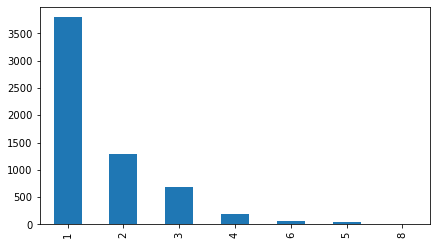

In [35]:
df.dodrace.value_counts().plot(kind='bar')

- select only object type in order to encode them

In [15]:
# Filter and select only the numeric columns
numeric_columns = df.select_dtypes(include=['object']).columns
numeric_columns

Index(['gender', 'date', 'installation', 'component', 'branch', 'primarymos',
       'subjectsbirthlocation', 'ethnicity', 'writingpreference'],
      dtype='object')

In [10]:
for i in numeric_columns:
    print(f"{i:<30}:",df[i].nunique())

gender                        : 2
date                          : 253
installation                  : 12
component                     : 3
branch                        : 3
primarymos                    : 285
subjectsbirthlocation         : 152
ethnicity                     : 209
writingpreference             : 3


In [11]:
df.shape

(6068, 108)

-  ethnicity : is same as subjectsbirthlocation and has many missing values so we drop it 
-  date : has no effect in the race 
-  subjectid : has no effect
-  SubjectNumericRace : and DODRace often indicate the same race so we drop SubjectNumericRace
-  Installation : not usefull
-  Heightin  dublicates from stature
-  Weightlbs : dublicates from weightkg 

In [16]:
droped_col = ['ethnicity','date','subjectid','subjectnumericrace','installation','heightin','weightlbs','primarymos']
df.drop(columns=droped_col, inplace=True)

####  Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [13]:
df['dodrace'].value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

In [17]:
dod = df.dodrace.value_counts()[df.dodrace.value_counts() < 500].index

In [18]:
for i in dod:
    drop_index = df[df['dodrace'] == i].index
    df.drop(index = drop_index , inplace=True)
df.reset_index(drop=True, inplace=True)

In [19]:
df['dodrace'].value_counts()

dodrace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [17]:
df.shape

(5769, 100)

#### subjectsbirthlocation values less than 100 replace it with other

In [17]:
df.subjectsbirthlocation.value_counts()

California                417
New York                  411
Texas                     386
Indiana                   264
Florida                   210
Illinois                  210
Oklahoma                  205
Minnesota                 194
Michigan                  194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
New Jersey                 88
Puerto Rico                88
Missouri                   83
Colorado                   78
Maryland                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota               53
Arkansas  

In [20]:
less_hundred = df.subjectsbirthlocation.value_counts()[df.subjectsbirthlocation.value_counts() <= 50].index

In [19]:
dic = {
    "country" : less_hundred,
    "values" : df.subjectsbirthlocation.value_counts()[less_hundred]
}
pd.DataFrame(dic)

country  values
Oregon                                  Oregon      40
Mexico                                  Mexico      39
Connecticut                        Connecticut      36
Jamaica                                Jamaica      35
Nebraska                              Nebraska      30
Utah                                      Utah      27
West Virginia                    West Virginia      26
Nevada                                  Nevada      21
Idaho                                    Idaho      20
District of Columbia      District of Columbia      19
North Dakota                      North Dakota      18
Hawaii                                  Hawaii      18
Rhode Island                      Rhode Island      18
Maine                                    Maine      18
Delaware                              Delaware      17
Dominican Republic          Dominican Republic      17
New Mexico                          New Mexico      16
New Hampshire                    New Hampshire      14
Vermont                                Vermont      13
Colombia                              Colombia      13
Haiti                                    Haiti      12
Montana                                Montana      12
United Kingdom                  United Kingdom      11
Panama                                  Panama      10
Guyana                                  Guyana       8
Peru                                      Peru       8
Canada                                  Canada       8
Russia                                  Russia       8
Ukraine                                Ukraine       7
US Virgin Islands            US Virgin Islands       7
Alaska                                  Alaska       7
Japan                                    Japan       7
Wyoming                                Wyoming       7
Trinidad and Tobago        Trinidad and Tobago       7
Liberia                                Liberia       6
El Salvador                        El Salvador       5
Barbados                              Barbados       5
Ecuador                                Ecuador       5
Philippines                        Philippines       5
Poland                                  Poland       5
South Africa                      South Africa       4
Nicaragua                            Nicaragua       4
Portugal                              Portugal       4
Cuba                                      Cuba       4
Honduras                              Honduras       4
Nigeria                                Nigeria       4
Grenada                                Grenada       4
Belgium                                Belgium       3
Romania                                Romania       3
Kenya                                    Kenya       3
Israel                                  Israel       3
France                                  France       3
Guam                                      Guam       3
Morocco                                Morocco       3
Iraq                                      Iraq       2
Turkey                                  Turkey       2
Italy                                    Italy       2
Costa Rica                          Costa Rica       2
Ghana                                    Ghana       2
Antigua and Barbuda        Antigua and Barbuda       2
Sudan                                    Sudan       2
Sierra Leone                      Sierra Leone       2
Cameroon                              Cameroon       2
Netherlands                        Netherlands       2
Lebanon                                Lebanon       2
United States                    United States       2
Belize                                  Belize       2
Bolivia                                Bolivia       2
Bermuda                                Bermuda       1
Iran                                      Iran       1
Guatemala                            Guatemala       1
Ivory Coast                        Ivory Coast       1
Egypt                   

In [21]:
df['subjectsbirthlocation'] = df['subjectsbirthlocation'].replace(less_hundred,'other')

In [22]:
df.subjectsbirthlocation.value_counts()

subjectsbirthlocation
other             716
California        417
New York          411
Texas             386
Indiana           264
Florida           210
Illinois          210
Oklahoma          205
Minnesota         194
Michigan          194
Mississippi       193
Georgia           168
Alabama           164
South Carolina    161
North Carolina    145
Ohio              139
Louisiana         136
Pennsylvania      130
Virginia          113
Massachusetts     109
Wisconsin          99
Germany            90
Puerto Rico        88
New Jersey         88
Missouri           83
Colorado           78
Maryland           78
Arizona            75
Tennessee          74
Kentucky           67
Kansas             62
Washington         61
Iowa               55
Arkansas           53
South Dakota       53
Name: count, dtype: int64

In [22]:
df.head()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   
1                             233            1395                    326   
2                             287            1430                    341   
3                             234            1347                    310   
4                             250            1585                    372   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   
1                 220          1293                      245   
2                 230          1327                      256   
3                 230          1239                      262   
4                 247          1478                      267   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               202                401                        369   
1               193                394                        338   
2               196                427                        408   
3               199                401                        359   
4               224                435                        356   

   bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  \
0               274               493                  71               319   
1               257               479                  67               344   
2               261               544                  75               345   
3               262               518                  73               328   
4               263               524                  80               340   

   bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  \
0                        291                 142                   979   
1                        320                 135                   944   
2                        330                 135                  1054   
3                        309                 143                   991   
4                        310                 138                  1029   

   buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  \
0           240            882                619                     509   
1           232            870                584                     468   
2           258            901                623                     506   
3           242            821                560                     437   
4           275           1080                706                     567   

   calfcircumference  cervicaleheight  chestbreadth  chestcircumference  \
0                373             1535           291                1074   
1                357             1471           269                1021   
2                412             1501           288                1120   
3                395             1423           296                1114   
4                425             1684           304                1048   

   chestdepth  chestheight  crotchheight  crotchlengthomphalion  \
0         259         1292           877                    607   
1         253         1244           851                    615   
2         267         1288           854                    636   
3         262         1205           769                    590   
4         232         1452          1014                    682   

   crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  \
0                             351          36         71             19   
1                             376          33         62             18   
2                             359          40         61             23   
3                             341          39         66             25   
4                             382          32         56             19   

   elbowrestheight  eyeheightsitting  footbreadthhorizonta

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [23]:
x = df.drop('dodrace',axis=1)
y = df['dodrace']
print(x.shape)
print(y.shape)

(5769, 99)
(5769,)


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=49)

In [25]:
y_train.value_counts()

dodrace
1    3034
2    1038
3     543
Name: count, dtype: int64

In [26]:
numeric_columns = df.select_dtypes(include=['object']).columns
for i in numeric_columns:
    print(f"{i:<30}:",df[i].nunique())

gender                        : 2
component                     : 3
branch                        : 3
subjectsbirthlocation         : 35
writingpreference             : 3


- printing object types with there unique values for only thus have a unique value less than 9 

In [27]:
for i in numeric_columns:
    if (df[i].unique().size)<=9:
        print(i+": " ,df[i].unique(), "\nsize is: ", df[i].unique().size)
        print("\n")

gender:  ['Male' 'Female'] 
size is:  2


component:  ['Regular Army' 'Army National Guard' 'Army Reserve'] 
size is:  3


branch:  ['Combat Arms' 'Combat Support' 'Combat Service Support'] 
size is:  3


writingpreference:  ['Right hand' 'Left hand' 'Either hand (No preference)'] 
size is:  3




- ordinal encoder

In [28]:
gender_cat = ['Male', 'Female']
component_cat=  ['Regular Army' ,'Army National Guard' ,'Army Reserve']
branch_cat =  ['Combat Arms', 'Combat Support', 'Combat Service Support']
writingpreference_cat =  ['Right hand', 'Left hand', 'Either hand (No preference)']
ordinal_cat = [gender_cat, component_cat, branch_cat, writingpreference_cat]
ordinal_features = ['gender','component','branch','writingpreference']

- one-hot encoder

In [29]:
one_hot = ['subjectsbirthlocation']

- column transformer

In [30]:
column_transformer = make_column_transformer(
( OneHotEncoder(), one_hot ),
( OrdinalEncoder(categories= ordinal_cat), ordinal_features ),
remainder = 'passthrough'
)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

In [31]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Vanilla Logistic Model

In [32]:
operations = [("column_transformer", column_transformer ), ("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(x_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['subjectsbirthlocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard',
                                                                              'Army '
                                                                              'Reserve'],
                                                                             ['Combat '
                                                                              'Arms',
                                                                              'Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support'],
                                                                             ['Right '
                                                                              'hand',
                                                                              'Left '
                                                                              'hand',
                                                                              'Either '
                                                                              'hand '
                                                                              '(No '
                                                                              'preference)']]),
                                                  ['gender', 'component',
                                                   'branch',
                                                   'writingpreference'])])),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [33]:
eval_metric(pipe_model, x_train, y_train, x_test, y_test)

Test_Set
[[717  14  27]
 [ 15 241   4]
 [ 61   9  66]]
              precision    recall  f1-score   support

           1       0.90      0.95      0.92       758
           2       0.91      0.93      0.92       260
           3       0.68      0.49      0.57       136

    accuracy                           0.89      1154
   macro avg       0.83      0.79      0.80      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[2925   25   84]
 [  52  973   13]
 [ 189   29  325]]
              precision    recall  f1-score   support

           1       0.92      0.96      0.94      3034
           2       0.95      0.94      0.94      1038
           3       0.77      0.60      0.67       543

    accuracy                           0.92      4615
   macro avg       0.88      0.83      0.85      4615
weighted avg       0.91      0.92      0.91      4615



In [34]:
scores = cross_validate(pipe_model,
                        x_train,
                        y_train,
                        scoring=['accuracy', 'precision_micro','recall_micro','f1_micro'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.897284
train_accuracy           0.914987
test_precision_micro     0.897284
train_precision_micro    0.914987
test_recall_micro        0.897284
train_recall_micro       0.914987
test_f1_micro            0.897284
train_f1_micro           0.914987
dtype: float64

### Logistic Model GridsearchCV

In [35]:
operations = [("column_transformer", column_transformer ), ("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

In [36]:
pipe_model.get_params()

{'memory': None,
 'steps': [('column_transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder', OneHotEncoder(),
                                    ['subjectsbirthlocation']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Male', 'Female'],
                                                               ['Regular Army',
                                                                'Army National '
                                                                'Guard',
                                                                'Army Reserve'],
                                                               ['Combat Arms',
                                                                'Combat Support',
                                                                'Combat Service '
                                                                'Support']

- these parameter is setup based on the previous fit result

In [37]:
penalty = ["l1", "l2"]
C = [0.01,0.05, 0.1]
weight = ['balanced', {3:2}, None]
param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__class_weight": weight}

In [38]:
grid_model = GridSearchCV(pipe_model, param_grid = param_grid, cv=5, scoring= make_scorer(f1_score, average = None, 
                                                    labels =[3]), return_train_score=True)

In [39]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['subjectsbirthlocation']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Male',
                                                                                                     'Female'],
                                                                                                    ['Regular '
                                                                                                     'Army',
                                                                                                     'Army '
                                                                                                     'National '
                                                                                                     'Guard',
                                                                                                     'Army '
                                                                                                     'Reserve'],
                                                                                                    ['Combat '
                                                                                                     'Arms',
                                                                                                     'Combat '
                                                                                                     'Support',
                                                                                                     'Combat '
                                                                                                     'Serv...
                                                                                                     'hand '
                                                                                                     '(No '
                                                                                                     'preference)']]),
                                                                         ['gender',
                                                                          'component',
                                                                          'branch',
                                                                          'writingpreference'])])),
                                       ('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.05, 0.1],
                         'logistic__class_weight': ['balanced', {3: 2}, None],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [40]:
grid_model.best_params_

{'logistic__C': 0.05,
 'logistic__class_weight': {3: 2},
 'logistic__penalty': 'l2'}

In [41]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.630113
mean_train_score    0.688124
Name: 9, dtype: object

In [42]:
eval_metric(grid_model, x_train, y_train, x_test, y_test)

Test_Set
[[700   9  49]
 [ 16 233  11]
 [ 44   7  85]]
              precision    recall  f1-score   support

           1       0.92      0.92      0.92       758
           2       0.94      0.90      0.92       260
           3       0.59      0.62      0.60       136

    accuracy                           0.88      1154
   macro avg       0.81      0.81      0.81      1154
weighted avg       0.88      0.88      0.88      1154


Train_Set
[[2861   25  148]
 [  64  936   38]
 [ 148   22  373]]
              precision    recall  f1-score   support

           1       0.93      0.94      0.94      3034
           2       0.95      0.90      0.93      1038
           3       0.67      0.69      0.68       543

    accuracy                           0.90      4615
   macro avg       0.85      0.84      0.85      4615
weighted avg       0.90      0.90      0.90      4615



f1_hespanic = make_scorer(f1_score, average = None, labels =[3])
precision_hespanic = make_scorer(precision_score, average = None, labels =[3])
recall_hespanic = make_scorer(recall_score, average = None, labels =[3])


scoring = {"f1_hespanic":f1_hespanic,
           "precision_hespanic":precision_hespanic,
           "recall_hespanic":recall_hespanic}

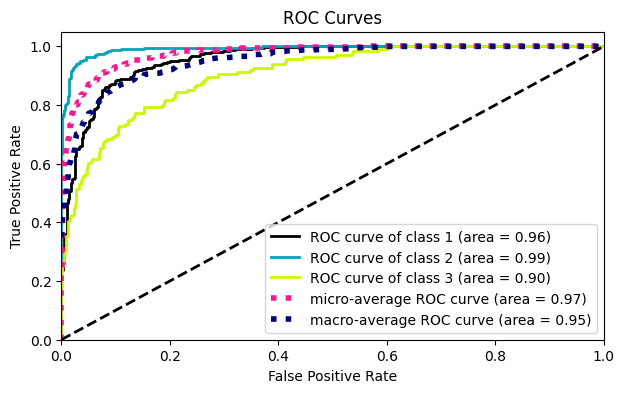

In [43]:
y_pred_proba = grid_model.predict_proba(x_test)
plot_roc(y_test, y_pred_proba)
plt.show();

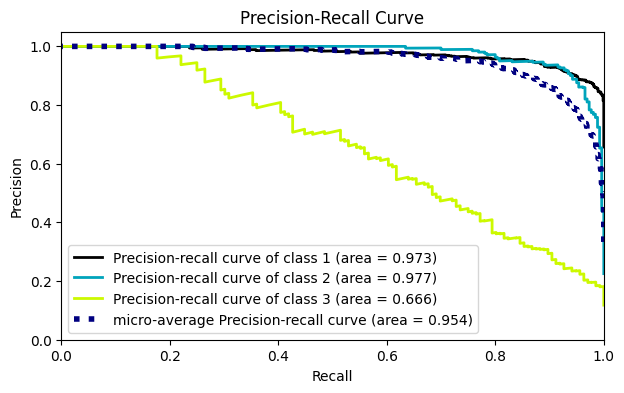

In [44]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

- the model is performe better after grid search we can see that from the f1-score so we will adopt the grid model for logistic regression

In [45]:
y_pred = grid_model.predict(x_test)
y_test_dummies = pd.get_dummies(y_test).values 
log_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2]) #0:white 1:black, 2:hispanic
log_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
log_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 2. SVC

### Vanilla SVC model 

In [46]:
operations = [("column_transformer", column_transformer ), ("scaler", StandardScaler()), ("svm", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(x_train, y_train)
eval_metric(pipe_model, x_train, y_train, x_test, y_test)

Test_Set
[[745   5   8]
 [ 29 229   2]
 [ 80   8  48]]
              precision    recall  f1-score   support

           1       0.87      0.98      0.92       758
           2       0.95      0.88      0.91       260
           3       0.83      0.35      0.49       136

    accuracy                           0.89      1154
   macro avg       0.88      0.74      0.78      1154
weighted avg       0.88      0.89      0.87      1154


Train_Set
[[3008    6   20]
 [  67  965    6]
 [ 247   27  269]]
              precision    recall  f1-score   support

           1       0.91      0.99      0.95      3034
           2       0.97      0.93      0.95      1038
           3       0.91      0.50      0.64       543

    accuracy                           0.92      4615
   macro avg       0.93      0.81      0.85      4615
weighted avg       0.92      0.92      0.91      4615



In [47]:
scores = cross_validate(pipe_model,
                        x_train,
                        y_train,
                        scoring=['accuracy', 'precision_micro','recall_micro','f1_micro'],
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy            0.88299
train_accuracy           0.91831
test_precision_micro     0.88299
train_precision_micro    0.91831
test_recall_micro        0.88299
train_recall_micro       0.91831
test_f1_micro            0.88299
train_f1_micro           0.91831
dtype: float64

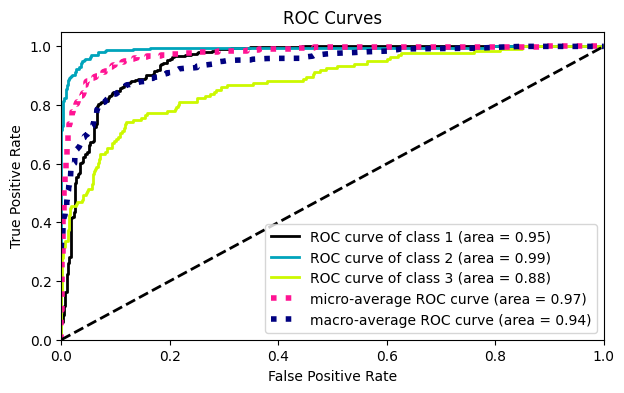

In [48]:
y_pred_proba = pipe_model.predict_proba(x_test)
plot_roc(y_test, y_pred_proba)
plt.show();

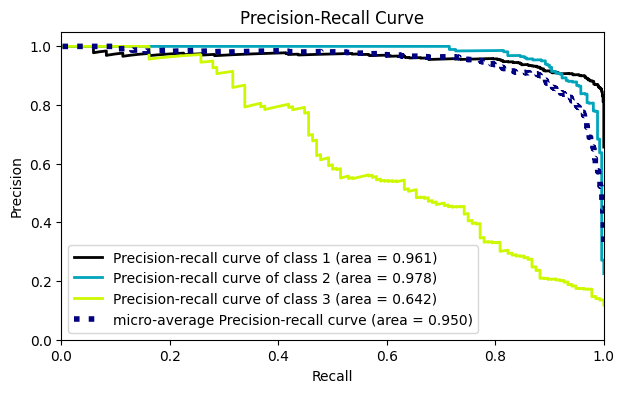

In [49]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

###  SVC Model GridsearchCV

- these parameter is setup based on the previous fit result

In [50]:
param_grid = {'SVC__C': [0.001, 0.005,0.03],
              'SVC__gamma': ["scale", 0.4, 0.5],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", {3:2} ,None]}

In [51]:
operations = [("column_transformer", column_transformer ), ("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring=make_scorer(f1_score, average = None, 
                                                    labels =[3]),
                              cv=5,
                              return_train_score=True)


In [52]:
svm_model_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['subjectsbirthlocation']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Male',
                                                                                                     'Female'],
                                                                                                    ['Regular '
                                                                                                     'Army',
                                                                                                     'Army '
                                                                                                     'National '
                                                                                                     'Guard',
                                                                                                     'Army '
                                                                                                     'Reserve'],
                                                                                                    ['Combat '
                                                                                                     'Arms',
                                                                                                     'Combat '
                                                                                                     'Support',
                                                                                                     'Combat '
                                                                                                     'Serv...
                                                                                                     'preference)']]),
                                                                         ['gender',
                                                                          'component',
                                                                          'branch',
                                                                          'writingpreference'])])),
                                       ('scaler', StandardScaler()),
                                       ('SVC', SVC(probability=True))]),
             param_grid={'SVC__C': [0.001, 0.005, 0.03],
                         'SVC__class_weight': ['balanced', {3: 2}, None],
                         'SVC__gamma': ['scale', 0.4, 0.5],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [53]:
svm_model_grid.best_params_

{'SVC__C': 0.005,
 'SVC__class_weight': {3: 2},
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

In [54]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.635286
mean_train_score    0.669361
Name: 25, dtype: object

In [55]:
eval_metric(svm_model_grid, x_train, y_train, x_test, y_test)

Test_Set
[[710   6  42]
 [ 22 227  11]
 [ 52   6  78]]
              precision    recall  f1-score   support

           1       0.91      0.94      0.92       758
           2       0.95      0.87      0.91       260
           3       0.60      0.57      0.58       136

    accuracy                           0.88      1154
   macro avg       0.82      0.79      0.80      1154
weighted avg       0.88      0.88      0.88      1154


Train_Set
[[2885   20  129]
 [  86  913   39]
 [ 163   24  356]]
              precision    recall  f1-score   support

           1       0.92      0.95      0.94      3034
           2       0.95      0.88      0.92      1038
           3       0.68      0.66      0.67       543

    accuracy                           0.90      4615
   macro avg       0.85      0.83      0.84      4615
weighted avg       0.90      0.90      0.90      4615



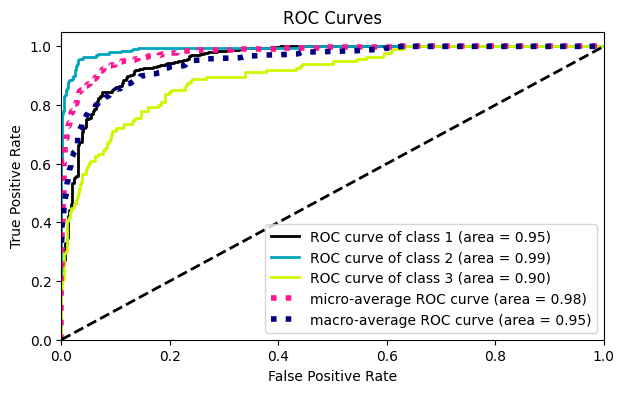

In [56]:
y_pred_proba = svm_model_grid.predict_proba(x_test)
plot_roc(y_test, y_pred_proba)
plt.show();

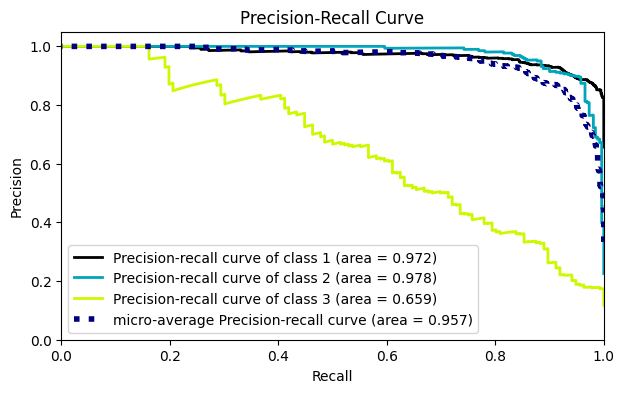

In [57]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [58]:
y_pred = svm_model_grid.predict(x_test)
y_test_dummies = pd.get_dummies(y_test).values 
svm_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2]) #0:white 1:black, 2:hispanic
svm_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
svm_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 3. RF

### Vanilla RF Model

In [95]:
operations = [("column_transformer", column_transformer ), ("random", RandomForestClassifier(random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(x_train, y_train)
eval_metric(pipe_model, x_train, y_train, x_test, y_test)

Test_Set
[[743  11   4]
 [ 69 190   1]
 [111   6  19]]
              precision    recall  f1-score   support

           1       0.80      0.98      0.88       758
           2       0.92      0.73      0.81       260
           3       0.79      0.14      0.24       136

    accuracy                           0.82      1154
   macro avg       0.84      0.62      0.65      1154
weighted avg       0.83      0.82      0.79      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [60]:
scores = cross_validate(pipe_model,
                        x_train,
                        y_train,
                        scoring=['accuracy', 'precision_micro','recall_micro','f1_micro'],
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy            0.823835
train_accuracy           1.000000
test_precision_micro     0.823835
train_precision_micro    1.000000
test_recall_micro        0.823835
train_recall_micro       1.000000
test_f1_micro            0.823835
train_f1_micro           1.000000
dtype: float64

### RF Model GridsearchCV

##### for random forest we most use ordinal encoder only 

In [61]:
enc_ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
cols_ordinal = ['subjectsbirthlocation','gender','component','branch','writingpreference']

cols_trans_ord = make_column_transformer((enc_ord, cols_ordinal),
                                     remainder='passthrough', verbose_feature_names_out=False)

- these parameter is setup based on the previous fit result

In [81]:
param_grid = {
    'random__n_estimators': [32,64],
    'random__max_features': [1,2,3, 'sqrt'],
    'random__max_depth': [1,2,3],
    'random__min_samples_split': [2, 3, 4],
    'random__min_samples_leaf': [1,2,3],
    'random__max_samples': [0.3,0.5,0.8]
}

In [82]:
operations = [("column_transformer", cols_trans_ord ),  ("random", RandomForestClassifier(random_state=101))]
pipe_model = Pipeline(steps=operations)

random_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring=make_scorer(f1_score, average = None, 
                                                    labels =[3]),
                              cv=5,
                              return_train_score=True).fit(x_train,y_train)

In [83]:
random_model_grid.best_params_

{'random__max_depth': 1,
 'random__max_features': 1,
 'random__max_samples': 0.3,
 'random__min_samples_leaf': 1,
 'random__min_samples_split': 2,
 'random__n_estimators': 32}

In [84]:
eval_metric(random_model_grid, x_train, y_train, x_test, y_test)

Test_Set
[[758   0   0]
 [260   0   0]
 [136   0   0]]
              precision    recall  f1-score   support

           1       0.66      1.00      0.79       758
           2       0.00      0.00      0.00       260
           3       0.00      0.00      0.00       136

    accuracy                           0.66      1154
   macro avg       0.22      0.33      0.26      1154
weighted avg       0.43      0.66      0.52      1154


Train_Set
[[3034    0    0]
 [1038    0    0]
 [ 543    0    0]]
              precision    recall  f1-score   support

           1       0.66      1.00      0.79      3034
           2       0.00      0.00      0.00      1038
           3       0.00      0.00      0.00       543

    accuracy                           0.66      4615
   macro avg       0.22      0.33      0.26      4615
weighted avg       0.43      0.66      0.52      4615



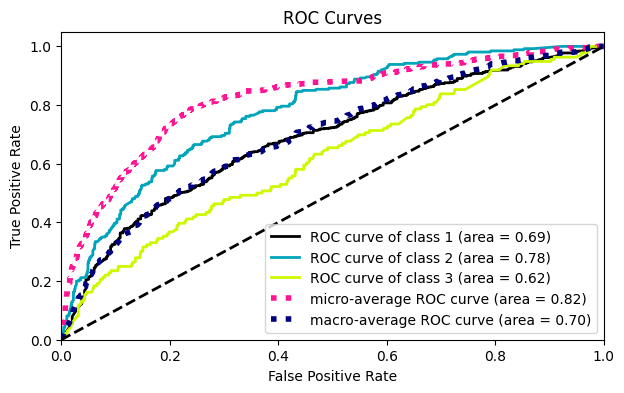

In [85]:
y_pred_proba = random_model_grid.predict_proba(x_test)
plot_roc(y_test, y_pred_proba)
plt.show();

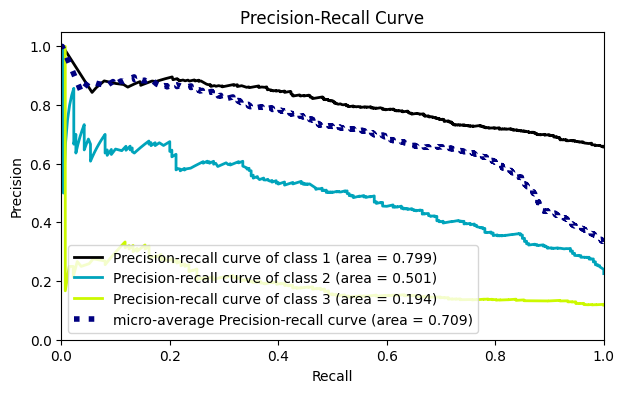

In [86]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [96]:
y_pred = pipe_model.predict(x_test)
y_test_dummies = pd.get_dummies(y_test).values 
random_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2]) #0:white 1:black, 2:hispanic
random_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
random_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 4. XGBoost

##### for xgboost we most use ordinal encoder only and use label encoder for the target class

In [68]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

### Vanilla XGBoost Model

In [69]:
steps_xg = [("OrdinalEncoder", cols_trans_ord), ("xgboost", XGBClassifier(random_state=42))]
pipe_xg = Pipeline(steps=steps_xg)
pipe_xg.fit(x_train, y_train_le)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['subjectsbirthlocation',
                                                   'gender', 'component',
                                                   'branch',
                                                   'writingpreference'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callback...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [70]:
eval_metric(pipe_xg, x_train, y_train_le, x_test, y_test_le)

Test_Set
[[735  12  11]
 [ 29 227   4]
 [ 83   7  46]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       758
           1       0.92      0.87      0.90       260
           2       0.75      0.34      0.47       136

    accuracy                           0.87      1154
   macro avg       0.85      0.73      0.76      1154
weighted avg       0.87      0.87      0.86      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [71]:
pipe_xg_h = Pipeline(steps = steps_xg)
scores_xg_h = cross_validate(pipe_xg_h,
                        x_train,
                        y_train_le,
                        scoring = make_scorer(f1_score, labels = [2],  pos_label =1, average=None),
                        cv = 5,
                        return_train_score=True)
df_scores_xg_h = pd.DataFrame(scores_xg_h, index = range(1, 6))

df_scores_xg_h.mean()[2:]

test_score     0.462827
train_score    1.000000
dtype: float64

### XGBoost Model GridsearchCV

- these parameter is setup based on the previous fit result

In [89]:
parameters_xgb = {"xgboost__n_estimators":[30,50],
              'xgboost__max_depth':[4,5],
              "xgboost__learning_rate": [0.2,0.3],
              "xgboost__subsample":[0.8, 0.9],
              "xgboost__colsample_bytree":[0.7,0.9,1]}
xgb_pipe_op = Pipeline(steps = steps_xg)
xgb_grid = GridSearchCV(xgb_pipe_op, parameters_xgb, scoring=make_scorer(f1_score, labels = [2],  pos_label =1, average=None), n_jobs=1,
                        return_train_score=True)
xgb_grid.fit(x_train, y_train_le)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['subjectsbirthlocation',
                                                                          'gender',
                                                                          'component',
                                                                          'branch',
                                                                          'writingpreference'])],
                                                          verbose_feature_names_out=False)),
                                       ('xgboost',
                                        XGBClassifier(base_score=Non...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             n_jobs=1,
             param_grid={'xgboost__colsample_bytree': [0.7, 0.9, 1],
                         'xgboost__learning_rate': [0.2, 0.3],
                         'xgboost__max_depth': [4, 5],
                         'xgboost__n_estimators': [30, 50],
                         'xgboost__subsample': [0.8, 0.9]},
             return_train_score=True,
             scoring=make_scorer(f1_score, labels=[2], pos_label=1, average=None))

In [90]:
xgb_grid.best_params_

{'xgboost__colsample_bytree': 0.7,
 'xgboost__learning_rate': 0.2,
 'xgboost__max_depth': 4,
 'xgboost__n_estimators': 50,
 'xgboost__subsample': 0.8}

In [91]:
eval_metric(xgb_grid, x_train, y_train_le, x_test, y_test_le)

Test_Set
[[730  15  13]
 [ 31 222   7]
 [ 89   7  40]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       758
           1       0.91      0.85      0.88       260
           2       0.67      0.29      0.41       136

    accuracy                           0.86      1154
   macro avg       0.81      0.70      0.73      1154
weighted avg       0.85      0.86      0.84      1154


Train_Set
[[3021    7    6]
 [  55  982    1]
 [ 161   23  359]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3034
           1       0.97      0.95      0.96      1038
           2       0.98      0.66      0.79       543

    accuracy                           0.95      4615
   macro avg       0.96      0.87      0.90      4615
weighted avg       0.95      0.95      0.94      4615



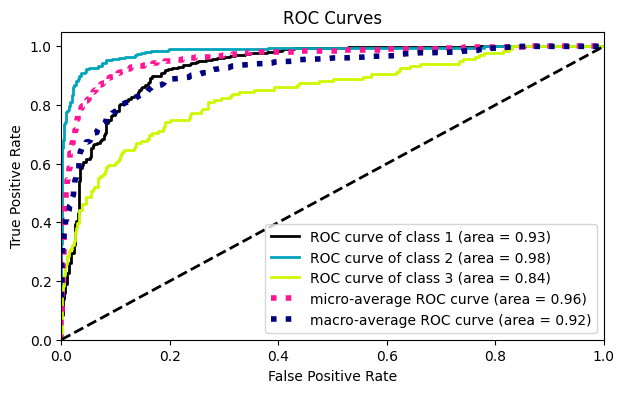

In [92]:
y_pred_proba = xgb_grid.predict_proba(x_test)
plot_roc(y_test, y_pred_proba)
plt.show();

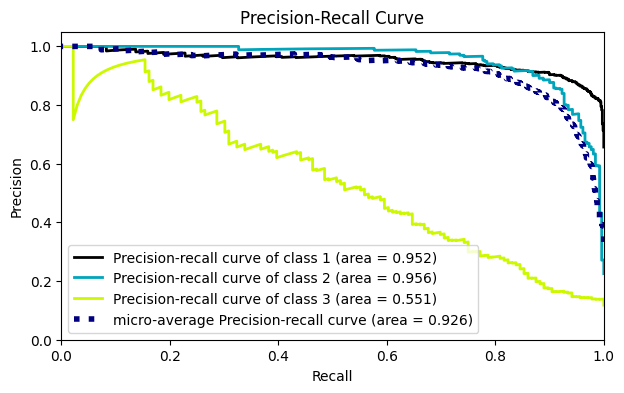

In [93]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [94]:
y_pred = xgb_grid.predict(x_test)
y_test_dummies = pd.get_dummies(y_test).values 
xgb_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2]) #0:white 1:black, 2:hispanic
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=[2])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=[2])

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [98]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as impip

## Logistic Regression Over/ Under Sampling

In [99]:
#
#not majority
under = RandomUnderSampler(sampling_strategy = "not majority", random_state = 101)
#over = SMOTE(sampling_strategy = "minority",random_state = 101)
#X_train_t = column_transformer.fit_transform(x_train)
#X_train_o, y_train_o = under.fit_resample(X_train_t, y_train)
#X_train_o, y_train_o = over.fit_resample(X_train_o, y_train_o)

In [100]:
steps_os = [('transformer', column_transformer), ('under', under) ,('scaler', StandardScaler()),
            ('logistic', LogisticRegression())]
pipe_os_lr = impip(steps=steps_os)
pipe_os_lr.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['subjectsbirthlocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard',
                                                                              'Army '
                                                                              'Reserve'],
                                                                             ['Combat '
                                                                              'Arms',
                                                                              'Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support'],
                                                                             ['Right '
                                                                              'hand',
                                                                              'Left '
                                                                              'hand',
                                                                              'Either '
                                                                              'hand '
                                                                              '(No '
                                                                              'preference)']]),
                                                  ['gender', 'component',
                                                   'branch',
                                                   'writingpreference'])])),
                ('under',
                 RandomUnderSampler(random_state=101,
                                    sampling_strategy='not majority')),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [101]:
eval_metric(pipe_os_lr, x_train, y_train, x_test, y_test)

Test_Set
[[723   8  27]
 [ 23 231   6]
 [ 60   8  68]]
              precision    recall  f1-score   support

           1       0.90      0.95      0.92       758
           2       0.94      0.89      0.91       260
           3       0.67      0.50      0.57       136

    accuracy                           0.89      1154
   macro avg       0.84      0.78      0.80      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[2938   16   80]
 [  73  932   33]
 [ 195   18  330]]
              precision    recall  f1-score   support

           1       0.92      0.97      0.94      3034
           2       0.96      0.90      0.93      1038
           3       0.74      0.61      0.67       543

    accuracy                           0.91      4615
   macro avg       0.88      0.82      0.85      4615
weighted avg       0.91      0.91      0.91      4615



In [102]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]
weight = ['balanced', None]
param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__class_weight": weight}
grid_model = GridSearchCV(pipe_os_lr, param_grid = param_grid, cv=5, return_train_score=True,
                          scoring=make_scorer(f1_score, average = None,labels =[3]))
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['subjectsbirthlocation']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Male',
                                                                                                     'Female'],
                                                                                                    ['Regular '
                                                                                                     'Army',
                                                                                                     'Army '
                                                                                                     'National '
                                                                                                     'Guard',
                                                                                                     'Army '
                                                                                                     'Reserve'],
                                                                                                    ['Combat '
                                                                                                     'Arms',
                                                                                                     'Combat '
                                                                                                     'Support',
                                                                                                     'Combat '
                                                                                                     'Service '
                                                                                                     'Su...
                                       ('under',
                                        RandomUnderSampler(random_state=101,
                                                           sampling_strategy='not '
                                                                             'majority')),
                                       ('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [103]:
eval_metric(grid_model, x_train, y_train, x_test, y_test)

Test_Set
[[723   8  27]
 [ 23 231   6]
 [ 60   8  68]]
              precision    recall  f1-score   support

           1       0.90      0.95      0.92       758
           2       0.94      0.89      0.91       260
           3       0.67      0.50      0.57       136

    accuracy                           0.89      1154
   macro avg       0.84      0.78      0.80      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[2938   16   80]
 [  73  932   33]
 [ 195   18  330]]
              precision    recall  f1-score   support

           1       0.92      0.97      0.94      3034
           2       0.96      0.90      0.93      1038
           3       0.74      0.61      0.67       543

    accuracy                           0.91      4615
   macro avg       0.88      0.82      0.85      4615
weighted avg       0.91      0.91      0.91      4615



In [104]:
grid_model.best_params_

{'logistic__C': 1, 'logistic__class_weight': None, 'logistic__penalty': 'l2'}

In [105]:
y_pred = grid_model.predict(x_test)
y_pred_proba = grid_model.predict_proba(x_test)
y_test_dummies = pd.get_dummies(y_test).values 
over_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2]) #0:white 1:black, 2:hispanic
over_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
over_recall = recall_score(y_test, y_pred, average=None, labels=[3])

# Compare Models

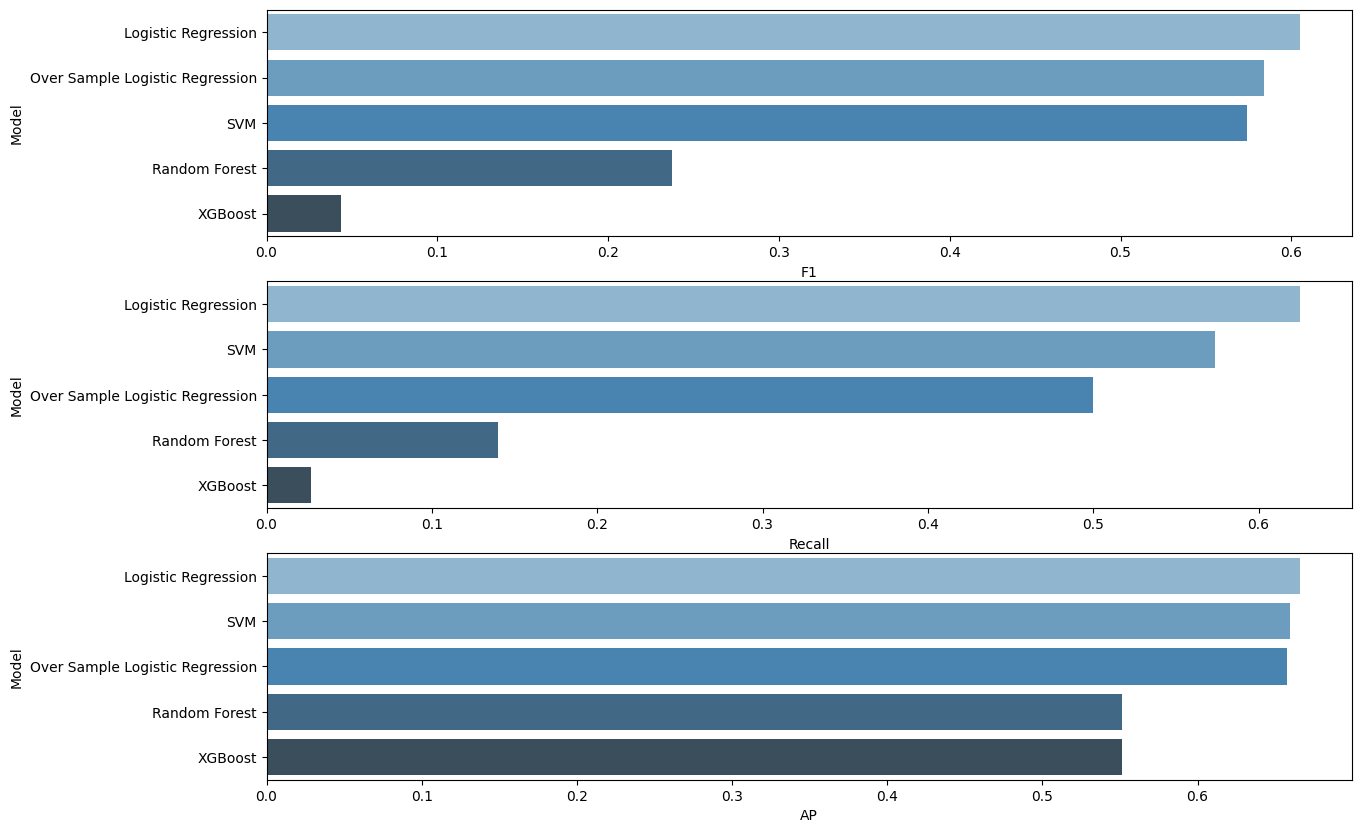

In [106]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "Over Sample Logistic Regression" ,"SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svm_f1[0], over_f1[0], random_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], over_recall[0], svm_recall[0], random_recall[0], xgb_recall[0]],
        "AP": [log_AP, over_AP, svm_AP, random_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")


plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")


plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")

plt.show();

### As we can see from the above image that vanilla logistic regression is the best performance

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

##### shap doesnt work with pipeline, so we will implement everything maniual 

In [107]:
under = RandomUnderSampler(sampling_strategy = "not majority", random_state = 101)
X_train_o, y_train_o = under.fit_resample(x_train, y_train)

In [108]:
cols = x.select_dtypes(include=['object']).columns
cols

Index(['gender', 'component', 'branch', 'subjectsbirthlocation',
       'writingpreference'],
      dtype='object')

In [109]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), cols),
    remainder=StandardScaler(),
    verbose_feature_names_out=False,
)

In [110]:
x_train_sha = column_trans.fit_transform(X_train_o)
x_test_sha = column_trans.transform(x_test)

In [111]:
#since we will make a feature selection, we need to make the penalty hyper_parameter l1 (lasso)
logistic_sha = LogisticRegression(penalty="l1", solver="saga")
logistic_sha.fit(x_train_sha, y_train_o)

LogisticRegression(penalty='l1', solver='saga')

In [112]:
eval_metric(logistic_sha, x_train_sha, y_train_o, x_test_sha, y_test)

Test_Set
[[724   9  25]
 [ 25 232   3]
 [ 67   7  62]]
              precision    recall  f1-score   support

           1       0.89      0.96      0.92       758
           2       0.94      0.89      0.91       260
           3       0.69      0.46      0.55       136

    accuracy                           0.88      1154
   macro avg       0.84      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[2948   13   73]
 [  35  489   19]
 [ 205   23  315]]
              precision    recall  f1-score   support

           1       0.92      0.97      0.95      3034
           2       0.93      0.90      0.92       543
           3       0.77      0.58      0.66       543

    accuracy                           0.91      4120
   macro avg       0.88      0.82      0.84      4120
weighted avg       0.91      0.91      0.91      4120



In [113]:
features = column_trans.get_feature_names_out()
features

array(['gender_Female', 'gender_Male', 'component_Army National Guard',
       'component_Army Reserve', 'component_Regular Army',
       'branch_Combat Arms', 'branch_Combat Service Support',
       'branch_Combat Support', 'subjectsbirthlocation_Alabama',
       'subjectsbirthlocation_Arizona', 'subjectsbirthlocation_Arkansas',
       'subjectsbirthlocation_California',
       'subjectsbirthlocation_Colorado', 'subjectsbirthlocation_Florida',
       'subjectsbirthlocation_Georgia', 'subjectsbirthlocation_Germany',
       'subjectsbirthlocation_Illinois', 'subjectsbirthlocation_Indiana',
       'subjectsbirthlocation_Iowa', 'subjectsbirthlocation_Kansas',
       'subjectsbirthlocation_Kentucky',
       'subjectsbirthlocation_Louisiana',
       'subjectsbirthlocation_Maryland',
       'subjectsbirthlocation_Massachusetts',
       'subjectsbirthlocation_Michigan',
       'subjectsbirthlocation_Minnesota',
       'subjectsbirthlocation_Mississippi',
       'subjectsbirthlocation_Missouri

#### shap for train

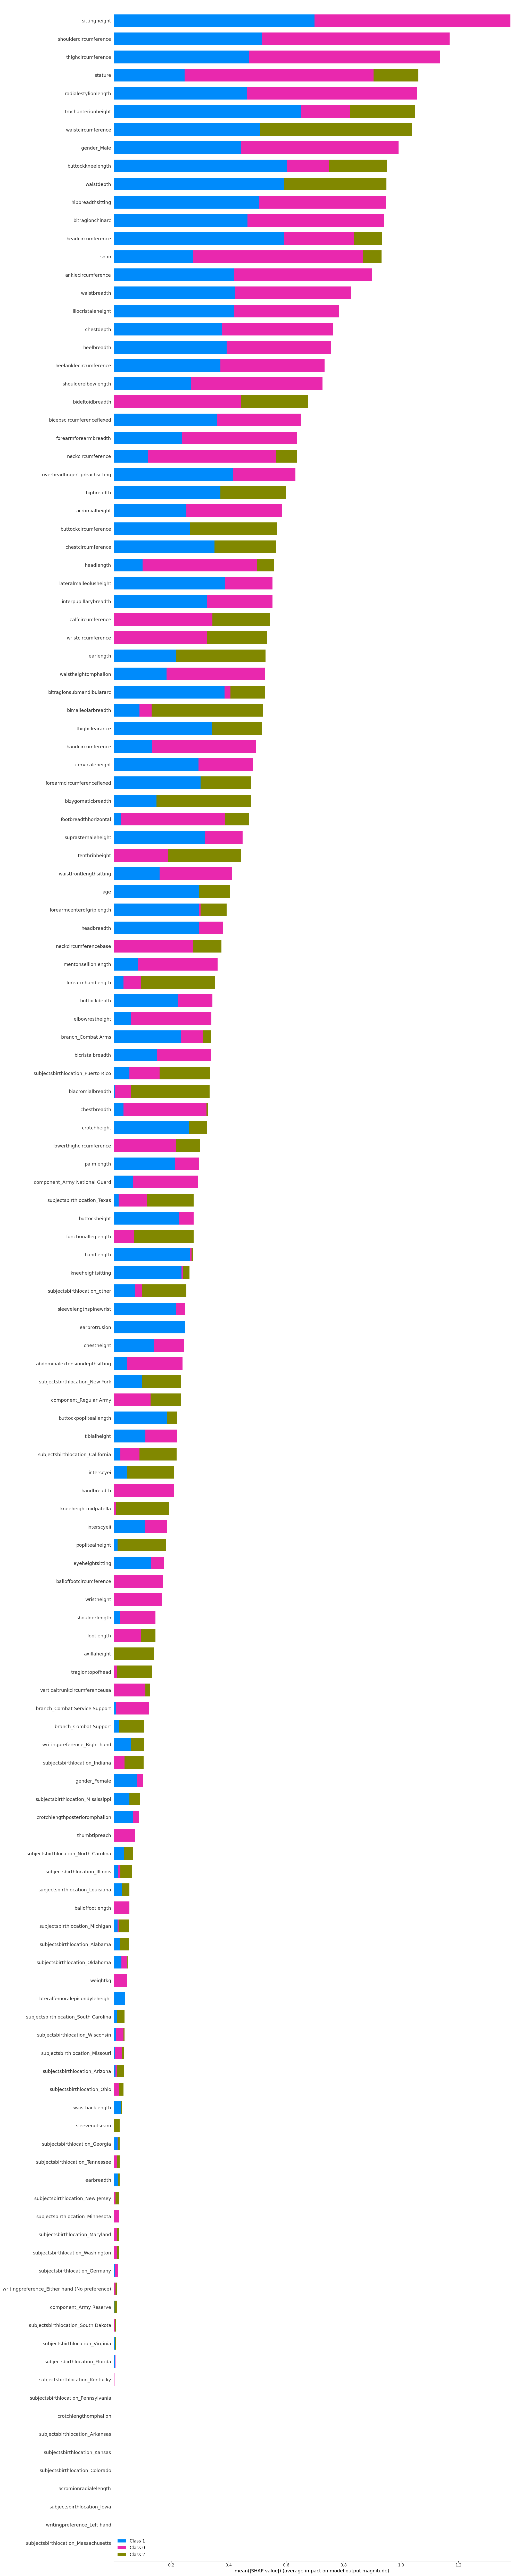

In [114]:
explainer = shap.Explainer(logistic_sha, x_train_sha)

shap_values = explainer.shap_values(x_train_sha)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)


In [115]:
hes_feat = ['crotchheight',
'bideltoidbreadth',
'trochanterionheight',
'tenthribheight',
'waistcircumference',
'earlength',
'suprasternaleheight',
'chestcircumference',
'biacromialbreadth',
'forearmcircumferenceflexed',
'neckcircumference',
'buttockcircumference',
'bimalleolarbreadth',
'hipbreadth',
'kneeheightmidpatella',
'lowerthighcircumference',
'forearmhandlength',
'component',
'functionalleglength',
'tragiontopofhead',
'balloffootcircumference',
'subjectsbirthlocation',
'axillaheight',
'shoulderlength',
'branch',
'writingpreference',
'verticaltrunkcircumferenceusa'
]

In [116]:
x1 = x[hes_feat]

In [117]:
x1.head()

crotchheight  bideltoidbreadth  trochanterionheight  tenthribheight  \
0           877               493                  919            1092   
1           851               479                  918            1076   
2           854               544                  918            1105   
3           769               518                  847            1021   
4          1014               524                 1090            1292   

   waistcircumference  earlength  suprasternaleheight  chestcircumference  \
0                 933         71                 1449                1074   
1                 870         62                 1387                1021   
2                 964         61                 1438                1120   
3                 857         66                 1346                1114   
4                 868         56                 1596                1048   

   biacromialbreadth  forearmcircumferenceflexed  neckcircumference  \
0                401                         299                400   
1                394                         289                380   
2                427                         357                403   
3                401                         318                407   
4                435                         324                398   

   buttockcircumference  bimalleolarbreadth  hipbreadth  kneeheightmidpatella  \
0                   979                  71         332                   502   
1                   944                  67         312                   490   
2                  1054                  75         349                   496   
3                   991                  73         338                   460   
4                  1029                  80         332                   612   

   lowerthighcircumference  forearmhandlength     component  \
0                      391                477  Regular Army   
1                      371                476  Regular Army   
2                      409                491  Regular Army   
3                      393                467  Regular Army   
4                      458                550  Regular Army   

   functionalleglength  tragiontopofhead  balloffootcircumference  \
0                 1136               140                      253   
1                 1096               120                      245   
2                 1115               125                      256   
3                 1034               127                      262   
4                 1279               122                      267   

  subjectsbirthlocation  axillaheight  shoulderlength                  branch  \
0                 other          1347             145             Combat Arms   
1              New York          1293             141          Combat Support   
2              New York          1327             167          Combat Support   
3             Wisconsin          1239             148  Combat Service Support   
4        North Carolina          1478             180  Combat Service Support   

  writingpreference  verticaltrunkcircumferenceusa  
0        Right hand                           1700  
1         Left hand                           1627  
2         Left hand                           1678  
3        Right hand                           1625  
4        Right hand                           1679

In [118]:
x1_cat = x1.select_dtypes("object").columns
x1_cat

Index(['component', 'subjectsbirthlocation', 'branch', 'writingpreference'], dtype='object')

In [119]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y, test_size=0.2, random_state=101, stratify=y)

In [120]:
column_trans_hes = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), x1_cat),
    remainder=StandardScaler(),
    verbose_feature_names_out=False,
)

operations_shap = [("one-hot", column_trans_hes),("under",under),("log", LogisticRegression(class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga",))]

pipe_shap_model = impip(steps=operations_shap)
pipe_shap_model.fit(x_train1, y_train1)

Pipeline(steps=[('one-hot',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['component', 'subjectsbirthlocation', 'branch', 'writingpreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('under',
                 RandomUnderSampler(random_state=101,
                                    sampling_strategy='not majority')),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [121]:
eval_metric(pipe_shap_model, x_train1, y_train1, x_test1, y_test1)

Test_Set
[[519  78 161]
 [ 27 212  21]
 [ 24  17  95]]
              precision    recall  f1-score   support

           1       0.91      0.68      0.78       758
           2       0.69      0.82      0.75       260
           3       0.34      0.70      0.46       136

    accuracy                           0.72      1154
   macro avg       0.65      0.73      0.66      1154
weighted avg       0.79      0.72      0.74      1154


Train_Set
[[2116  287  631]
 [ 103  868   67]
 [  92   31  420]]
              precision    recall  f1-score   support

           1       0.92      0.70      0.79      3034
           2       0.73      0.84      0.78      1038
           3       0.38      0.77      0.51       543

    accuracy                           0.74      4615
   macro avg       0.67      0.77      0.69      4615
weighted avg       0.81      0.74      0.76      4615



In [122]:
model = impip(steps=operations_shap)

scores = cross_validate(
    model, x_train1, y_train1, scoring=make_scorer(f1_score, average = None,labels =[3]), cv=5, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_score     0.488834
train_score    0.514416
dtype: float64

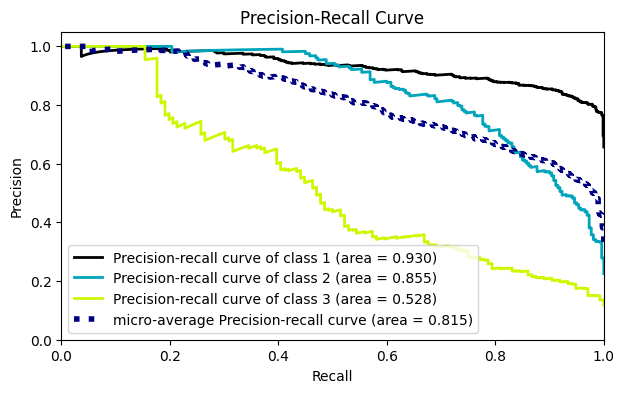

In [123]:
y_pred_proba = pipe_shap_model.predict_proba(x_test1)
plot_precision_recall(y_test1, y_pred_proba)
plt.show();

In [124]:
y_pred = pipe_shap_model.predict(x_test1)
y_pred_proba = pipe_shap_model.predict_proba(x_test1)
y_test_dummies = pd.get_dummies(y_test1).values 
shap_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2]) #0:white 1:black, 2:hispanic
shap_f1 = f1_score(y_test1, y_pred, average=None, labels=[3])
shap_recall = recall_score(y_test1, y_pred, average=None, labels=[3])

# Compare Models

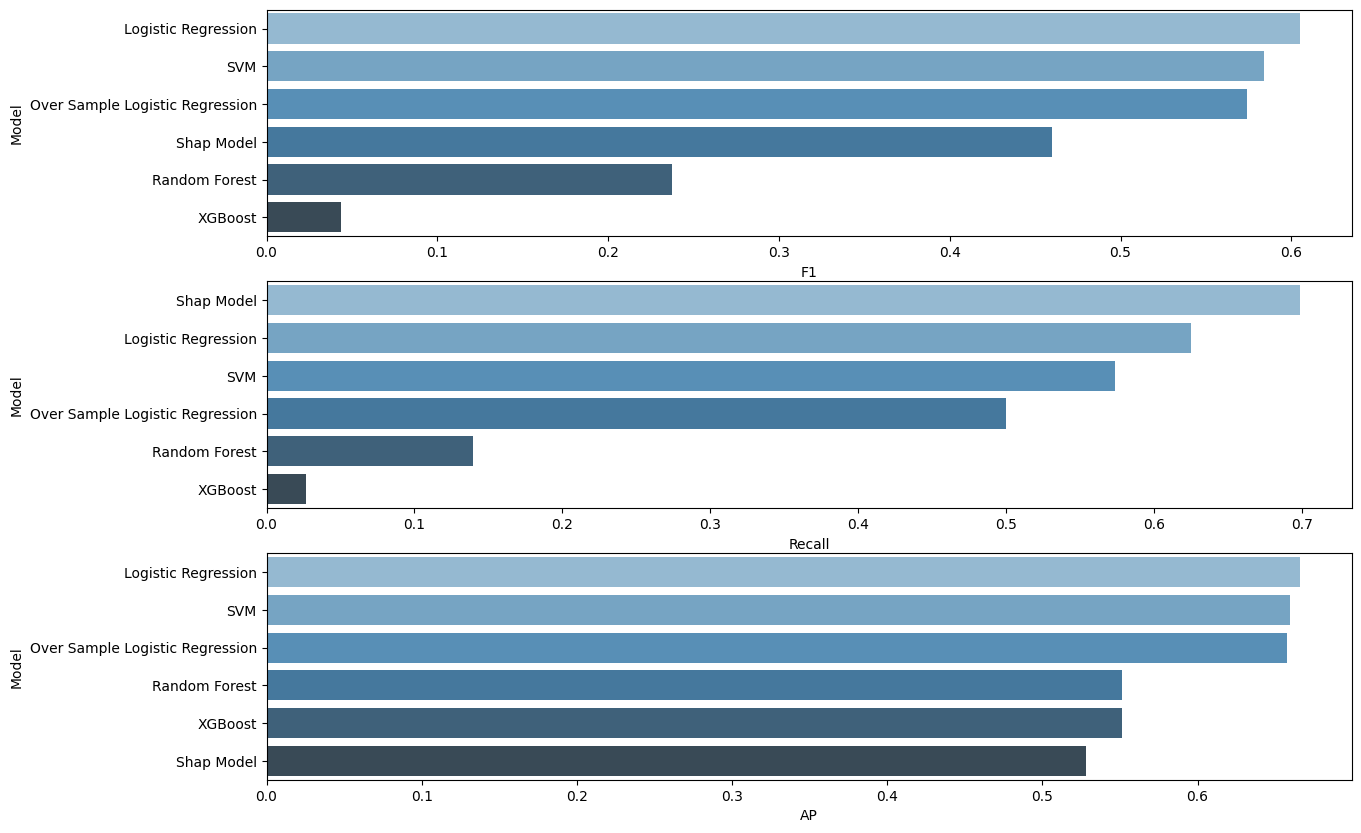

In [125]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "Shap Model","Over Sample Logistic Regression" ,"SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], shap_f1[0], over_f1[0], svm_f1[0], random_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], shap_recall[0], over_recall[0], svm_recall[0], random_recall[0], xgb_recall[0]],
        "AP": [log_AP, shap_AP, over_AP, svm_AP, random_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")


plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")


plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")

plt.show();

#### As we can see from the above image that vanilla logistic regression is the best performance, so we will adopt it .

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [127]:
final_step = [('transformer', column_transformer) ,('scaler', StandardScaler()),
            ('logistic', LogisticRegression())]

In [128]:
final_pipe = Pipeline(steps=final_step)
final_pipe.fit(x, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['subjectsbirthlocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard',
                                                                              'Army '
                                                                              'Reserve'],
                                                                             ['Combat '
                                                                              'Arms',
                                                                              'Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support'],
                                                                             ['Right '
                                                                              'hand',
                                                                              'Left '
                                                                              'hand',
                                                                              'Either '
                                                                              'hand '
                                                                              '(No '
                                                                              'preference)']]),
                                                  ['gender', 'component',
                                                   'branch',
                                                   'writingpreference'])])),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [129]:
y_pred = final_pipe.predict(x)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[3650   35  107]
 [  65 1218   15]
 [ 251   36  392]]
              precision    recall  f1-score   support

           1       0.92      0.96      0.94      3792
           2       0.94      0.94      0.94      1298
           3       0.76      0.58      0.66       679

    accuracy                           0.91      5769
   macro avg       0.88      0.83      0.85      5769
weighted avg       0.91      0.91      0.91      5769



#### Save the Model

In [130]:
pickle.dump(final_pipe, open('solider_race_final_model', 'wb'))

#### Load the Model

In [131]:
loaded_model = pickle.load(open('solider_race_final_model', 'rb'))

In [132]:
y_pred = loaded_model.predict(x)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[3650   35  107]
 [  65 1218   15]
 [ 251   36  392]]
              precision    recall  f1-score   support

           1       0.92      0.96      0.94      3792
           2       0.94      0.94      0.94      1298
           3       0.76      0.58      0.66       679

    accuracy                           0.91      5769
   macro avg       0.88      0.83      0.85      5769
weighted avg       0.91      0.91      0.91      5769



# I choose the best model (vanilla logistic regression) because it gives me the best result compare to other models 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___